In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import timeit
%matplotlib inline


In [2]:
from coloring.coloring import *
from coloring.examples import cycle


In [3]:
ALGORITHMS = {
    'AMIS_MULTIFOLD': amis_fold_color,
    'TOTAL_DSATUR_MULTIFOLD': total_dsatur_fold_color,
    'OUTER_DSATUR_MULTIFOLD': outer_dsatur_fold_color,
    'CS_INTERCHANGE_MULTIFOLD': cs_interchange_fold_color,
}


def run(algorithm, graph, folds):
    def func():
        return algorithm(graph, folds)
    return func


In [4]:
# test performance by cycle length
fold_values = [2, 3, 5]
times = dict()

min_cl = 5
max_cl = 75
step_cl = 2

for folds in fold_values:
    times[folds] = dict()
    for alg in ALGORITHMS.keys():
        times[folds][alg] = []

for folds in fold_values:
    for cycle_length in range(min_cl, max_cl, step_cl):
        graph = cycle(cycle_length)
        for alg, alg_func in ALGORITHMS.items():
            func = run(alg_func, graph, folds)
            time = timeit.timeit(func, number=10)
            times[folds][alg].append(time)

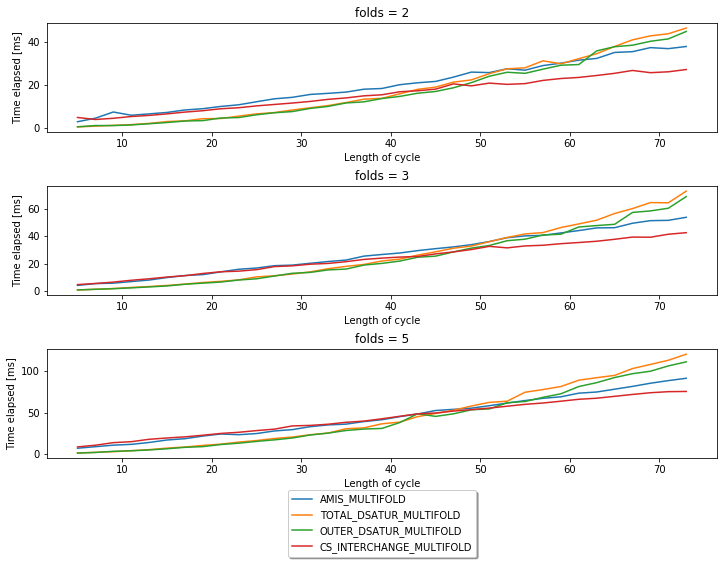

In [5]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

x = np.arange(min_cl, max_cl, step_cl)
for i, folds in enumerate(fold_values):
    ax = plt.subplot(3, 1, i + 1)
    for alg in ALGORITHMS.keys():
        plt.plot(x, np.array(times[folds][alg]) * 1000, label=alg)
    
    plt.xlabel('Length of cycle')
    plt.ylabel('Time elapsed [ms]')
    plt.title('folds = {}'.format(folds))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=1)
plt.show()

In [6]:
# test performance by number of folds
cycle_length = 45
fold_values = [2, 3, 5, 9, 15]

times = dict()
for alg in ALGORITHMS.keys():
    times[alg] = []

graph = cycle(cycle_length)
for folds in fold_values:
    for alg, alg_func in ALGORITHMS.items():
        func = run(alg_func, graph, folds)
        time = timeit.timeit(func, number=10)
        times[alg].append(time)

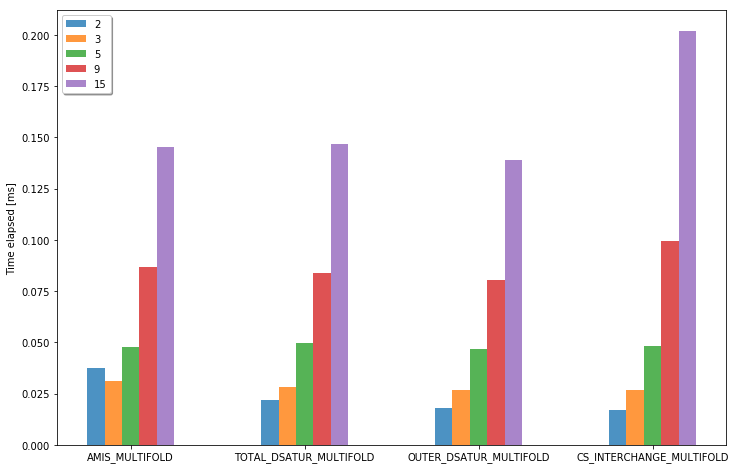

In [7]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

bar_width = 0.1
opacity = 0.8

x = np.arange(len(times))
for i, folds in enumerate(fold_values):
    values = np.array([v[i] for v in times.values()])
    plt.bar(x + i * bar_width, values, bar_width, alpha=opacity, label=str(folds))

plt.ylabel('Time elapsed [ms]')
plt.xticks(x + (i - 2) * bar_width, times.keys())
plt.legend(loc='best',shadow=True, ncol=1)
plt.show()

In [ ]:
cycle_length = 25
folds = 2
alg = 'AMIS_MULTIFOLD'


